# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Dawam Anwar Kurniawan]
- **Email:** [mdawam226@gmail.com]
- **ID Dicoding:** [dawam_anwar]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda antara pengguna terdaftar dan pengguna kasual?
- Bagaimana variasi penyewaan sepeda berdasarkan hari dalam seminggu dan jenis cuaca?
- Bagaimana cara mengelompokkan data penyewaan berdasarkan suhu, kelembapan, dan kecepatan angin untuk memahami pola penyewaan sepeda?
- Apa pola penyewaan sepeda berdasarkan musim dan bagaimana pengaruhnya terhadap jumlah sewa di setiap musim?
- Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana pengaruh cuaca terhadap perbedaan jumlah penyewaan antara pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih E-Commerce Public Dataset, maka saya mengimpor file yang saya butuhkan,saya mengimpornya file csv dari drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [ ]:

file_path = '/content/drive/My Drive/Dataset/day.csv'
# Load dataset
day_df = pd.read_csv(file_path)
# menampilkan 5 baris pertama dari dataset
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**A. Melakukan Load Pada** **Tabel** **Day**

### Assessing Data

**1. Melakukan pengecekan tipe data Day**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Bisa kita lihat bahwa terdapat tipe data yang tidak sesuai yakni Data yang perlu diperbaiki adalah: dteday -> datetime

**2. Selanjutnya kita akan melakukan cek apakah terdapat missing values**

In [ ]:
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Disini kita tidak menemukan adanya missing value

**3. Melakukan cek ,apakah terdapat dupikasi data**

In [ ]:
# Memeriksa duplikasi
duplicates = day_df.duplicated()
# Menampilkan jumlah baris yang duplikat
print("Jumlah baris yang duplikat:", duplicates.sum())


Jumlah baris yang duplikat: 0


Bisa kita lihat bahwa tidak terdapat indikasi duplikasi data

**4. Selanjutnya kita melakukan cek apakah ada keanehan pada ringkasan statistik pada data ini**

In [ ]:
# Menggunakan describe() untuk mendapatkan ringkasan statistik
summary = day_df.describe()
# Menampilkan ringkasan statistik
print(summary)

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Bisa kita lihat bahwa tidak terdapat sebuah keanehan pada data statistik ini

**B. Melakukan Load Pada** **Tabel** **Hour**

In [ ]:
# Load hour dataset
hr_df = pd.read_csv(file_path)
# Menampilkan 5 baris pertama dari dataset
print(hr_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**1. Melakukan cek info pada data hour**

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Bisa kita lihat bahwa terdapat tipe data yang tidak sesuai yakni Data yang perlu diperbaiki adalah: dteday -> datetime

**2. Selanjutnya kita akan melakukan cek apakah terdapat missing values**

In [ ]:
missing_values = hr_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Disini kita tidak menemukan adanya missing value

**3. Melakukan cek ,apakah terdapat dupikasi data**

In [ ]:
# Memeriksa duplikasi
duplicates = hr_df.duplicated()
# Menampilkan jumlah baris yang duplikat
print("Jumlah baris yang duplikat:", duplicates.sum())

Jumlah baris yang duplikat: 0


Bisa kita lihat bahwa tidak terdapat indikasi duplikasi data

**4. Sama seperti sebelumnya ,Selanjutnya kita melakukan cek apakah ada keanehan pada ringkasan statistik pada data ini**

In [ ]:
# Menggunakan describe() untuk mendapatkan ringkasan statistik
summary = hr_df.describe()
# Menampilkan ringkasan statistik
print(summary)

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Baik ,saya sudah melakukan pengecekan pada dataset dataset yang tersedia ,sebelum saya melakukan cleaning pada data ,disini saya menemukan bahwa terdapat kolom hr dalam dataset yang berbasis jam (hourly data), yang tidak muncul pada dataset berbasis harian (daily data).**

### Cleaning Data

Oke pada tahap cleaning ini pertama-tama saya akan melakukan penghapusan kolom kolom yang tidak saya gunakan ,hal ini bertujuan untuk mempermudah pengelolaan data ,agar saya mudah mendapatkan informasi yang relavan ,sesuai pertanyaan yang sudah didefinisikan sebelumnya.

In [ ]:
# Daftar kolom yang tidak diperlukan
kolom_tidak_perlu = ['dteday', 'yr', 'mnth']
# Menghapus kolom yang tidak diperlukan
hr_df_cleaned = hr_df.drop(columns=kolom_tidak_perlu)
# Menampilkan 5 baris pertama dari dataset setelah kolom-kolom dihapus
print(hr_df_cleaned.head())


   instant  season  holiday  weekday  workingday  weathersit      temp  \
0        1       1        0        6           0           2  0.344167   
1        2       1        0        0           0           2  0.363478   
2        3       1        0        1           1           1  0.196364   
3        4       1        0        2           1           1  0.200000   
4        5       1        0        3           1           1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  
0  0.363625  0.805833   0.160446     331         654   985  
1  0.353739  0.696087   0.248539     131         670   801  
2  0.189405  0.437273   0.248309     120        1229  1349  
3  0.212122  0.590435   0.160296     108        1454  1562  
4  0.229270  0.436957   0.186900      82        1518  1600  


In [ ]:
print(hr_df_cleaned.describe())

          instant      season     holiday  workingday  weathersit        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.028728    0.683995    1.395349    0.495385   
std    211.165812    1.110807    0.167155    0.465233    0.544894    0.183051   
min      1.000000    1.000000    0.000000    0.000000    1.000000    0.059130   
25%    183.500000    2.000000    0.000000    0.000000    1.000000    0.337083   
50%    366.000000    3.000000    0.000000    1.000000    1.000000    0.498333   
75%    548.500000    3.000000    0.000000    1.000000    2.000000    0.655417   
max    731.000000    4.000000    1.000000    1.000000    3.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.172367   
std      0.162961    0.142429    0.077498   686.622488  1

Saya akan mengubah kolom weekday yang tadinya numerik 0-6 menjadi  kategorikal senin-minggu begitu juga dengan weathersit

In [ ]:

hr_df_cleaned['weekday'] = hr_df_cleaned['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

hr_df_cleaned['weathersit'] = hr_df_cleaned['weathersit'].replace({
    1: 'Clear',
    2: 'Partly Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
})





Setelah cleaning daata selanjutnya saya akan melakukan ekplorasi data

## Exploratory Data Analysis (EDA)

### 1. Kelompokkan data berdasarkan hari dalam seminggu dari dataset yang sudah dibersihkan

In [ ]:
# Kelompokkan data berdasarkan hari dalam seminggu dari dataset hour yang sudah dibersihkan
grouped_data_hour = hr_df_cleaned.groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_data_hour)


     weekday       casual   registered          cnt
0     Friday   752.288462  3938.000000  4690.288462
1     Monday   674.133333  3663.990476  4338.123810
2   Saturday  1465.257143  3085.285714  4550.542857
3     Sunday  1338.295238  2890.533333  4228.828571
4   Thursday   590.961538  4076.298077  4667.259615
5    Tuesday   556.182692  3954.480769  4510.663462
6  Wednesday   551.144231  3997.394231  4548.538462


Pada Data Ini dapat dilihat bahwa Pengguna kasual dan terdaftar memiliki pola penyewaan yang berbeda. Pengguna kasual cenderung lebih aktif menyewa sepeda pada akhir pekan, sementara pengguna terdaftar lebih banyak menyewa sepeda pada hari kerja.

dalam hal ini Data menunjukkan variasi penyewaan sepeda berdasarkan hari dalam seminggu, dengan pengguna kasual mendominasi penyewaan di akhir pekan dan pengguna terdaftar lebih banyak menyewa di hari kerja.

Dengan demikian, analisis ini memberikan wawasan penting tentang perilaku pengguna yang bisa dijadikan acuan untuk menjawab persoalan ***tentang Pola penyewaan sepeda antar pengguna***

###2. Mengelompokkan data berdasarkan hari dan jenis cuaca

In [ ]:
# Mengelompokkan data berdasarkan hari dan jenis cuaca
grouped_weather_weekday = hr_df_cleaned.groupby(['weekday', 'weathersit']).agg({
    'casual': ['mean', 'max', 'min', 'sum'],
    'registered': ['mean', 'max', 'min', 'sum'],
    'cnt': ['mean', 'max', 'min', 'sum']
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_weather_weekday)

      weekday     weathersit       casual                      registered  \
                                     mean   max  min     sum         mean   
0      Friday          Clear   865.952381  1807   54   54555  4212.730159   
1      Friday  Partly Cloudy   577.634146  2469   38   23683  3515.853659   
2      Monday          Clear   702.363636  2557   41   46356  3783.287879   
3      Monday     Light Rain   111.000000   220    2     222  1282.500000   
4      Monday  Partly Cloudy   654.216216  3065   42   24206  3579.918919   
5    Saturday          Clear  1667.358209  3410   93  111713  3308.522388   
6    Saturday     Light Rain   408.500000  1264   57    1634  1604.000000   
7    Saturday  Partly Cloudy  1191.323529  3155   67   40505  2819.647059   
8      Sunday          Clear  1396.270270  3283   54  103324  2952.202703   
9      Sunday     Light Rain   120.000000   120  120     120   907.000000   
10     Sunday  Partly Cloudy  1235.900000  2613  114   37077  2804.533333   

 Dari informasi diatas kita mendapatkan data yang menjelaskan variasi penyewaan sepeda berdasarkan hari dalam seminggu dan jenis cuaca. Data yang dihasilkan akan memberikan wawasan tentang bagaimana penyewaan sepeda bervariasi tergantung pada hari dan kondisi cuaca,

###3. Mengelompokkan Data Penyewaan Berdasarkan Suhu, Kelembapan, dan Kecepatan Angin

In [ ]:
# Mengelompokkan data berdasarkan suhu, kelembapan, dan kecepatan angin
grouped_temp_hum_wind = hr_df_cleaned.groupby(['weekday','temp', 'hum', 'windspeed']).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_temp_hum_wind)


       weekday      temp       hum  windspeed  casual  registered     cnt
0       Friday  0.160870  0.537826   0.126548    54.0      1367.0  1421.0
1       Friday  0.177500  0.457083   0.353242    75.0      1468.0  1543.0
2       Friday  0.189091  0.506364   0.108550   149.0      1597.0  1746.0
3       Friday  0.196522  0.498696   0.168726   148.0      1362.0  1510.0
4       Friday  0.203478  0.793043   0.123300    38.0      1129.0  1167.0
..         ...       ...       ...        ...     ...         ...     ...
726  Wednesday  0.775000  0.402917   0.183463   755.0      3901.0  4656.0
727  Wednesday  0.775833  0.622083   0.136817   676.0      3725.0  4401.0
728  Wednesday  0.782500  0.592083   0.113812   872.0      5339.0  6211.0
729  Wednesday  0.789167  0.538750   0.134950  2562.0      4841.0  7403.0
730  Wednesday  0.793333  0.577083   0.137442   799.0      4914.0  5713.0

[731 rows x 7 columns]


Data ini menunjukkan penyewaan sepeda berdasarkan hari, suhu, kelembapan, dan kecepatan angin. Setiap baris mencakup informasi tentang jumlah penyewaan untuk pengguna kasual dan terdaftar. Misalnya, ada data untuk hari Jumat dan Rabu dengan berbagai nilai suhu dan kelembapan. Dari data ini, kita bisa lihat bagaimana cuaca memengaruhi seberapa banyak orang menyewa sepeda di hari-hari tertentu.

###4. Mengelompokkan data Pola Penyewaan Sepeda Berdasarkan Musim

In [ ]:
# Mengelompokkan data berdasarkan musim
grouped_season = hr_df_cleaned.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_season)


   season       casual   registered          cnt
0       1   334.928177  2269.204420  2604.132597
1       2  1106.097826  3886.233696  4992.331522
2       3  1202.611702  4441.691489  5644.303191
3       4   729.112360  3999.050562  4728.162921


Data ini menunjukkan penyewaan sepeda berdasarkan musim. Setiap musim memiliki rata-rata jumlah penyewaan untuk pengguna kasual dan terdaftar. Misalnya, musim kedua dan ketiga menunjukkan angka penyewaan yang paling tinggi, dengan pengguna terdaftar menyewa lebih banyak dibandingkan pengguna kasual. Ini memberikan gambaran bahwa cuaca atau aktivitas di musim tertentu mempengaruhi minat orang untuk menyewa sepeda.

###5. Mengelompokkan data Perbedaan Pola Penyewaan Antara Hari Kerja dan Hari Libur

In [ ]:
# Mengelompokkan data berdasarkan hari kerja
grouped_workingday = hr_df_cleaned.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_workingday)


   workingday       casual   registered          cnt
0           0  1371.134199  2959.034632  4330.168831
1           1   606.570000  3978.250000  4584.820000



kalo data ini menggambarkan pola penyewaan sepeda berdasarkan status hari kerja (working day). Pada hari kerja (working day = 1), jumlah penyewaan sepeda oleh pengguna terdaftar jauh lebih tinggi dibandingkan dengan pengguna kasual, dengan total penyewaan mencapai sekitar 4585.

###6. Mengelompokkan data Pengaruh Cuaca Terhadap Perbedaan Jumlah Penyewaan

In [ ]:
# Mengelompokkan data berdasarkan cuaca
grouped_weather = hr_df_cleaned.groupby('weathersit').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Tampilkan data hasil pengelompokan
print(grouped_weather)


      weathersit      casual   registered          cnt
0          Clear  964.030238  3912.755940  4876.786177
1     Light Rain  185.476190  1617.809524  1803.285714
2  Partly Cloudy  687.352227  3348.510121  4035.862348


didalam data ini menggambarkan pola penyewaan sepeda berdasarkan kondisi cuaca. Penyewaan paling tinggi terjadi saat cuaca cerah, sedangkan saat hujan ringan, jumlah penyewaan turun secara signifikan. Cuaca yang lebih baik umumnya mendorong lebih banyak orang untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pola penyewaan sepeda antara pengguna terdaftar dan pengguna kasual?


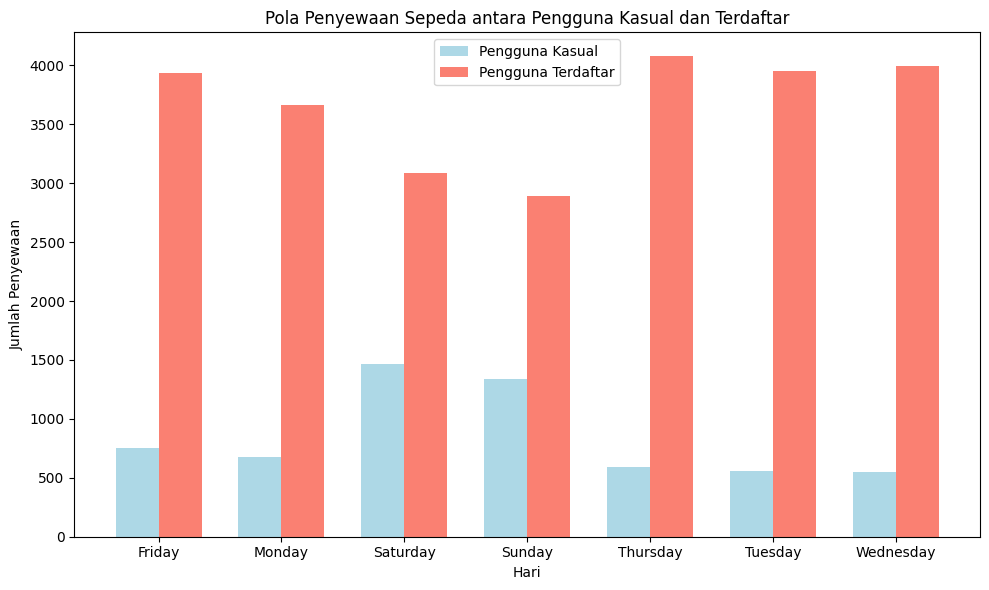

In [ ]:

# Data
data = {
    'weekday': ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
    'casual': [752.29, 674.13, 1465.26, 1338.30, 590.96, 556.18, 551.14],
    'registered': [3938.00, 3663.99, 3085.29, 2890.53, 4076.30, 3954.48, 3997.39]
}

df = pd.DataFrame(data)

# Mengatur lebar bar
bar_width = 0.35
index = range(len(df))

# Membuat grafik batang
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, df['casual'], bar_width, label='Pengguna Kasual', color='lightblue')
bar2 = plt.bar([i + bar_width for i in index], df['registered'], bar_width, label='Pengguna Terdaftar', color='salmon')

# Menambahkan label dan judul
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pola Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar')
plt.xticks([i + bar_width / 2 for i in index], df['weekday'])
plt.legend()
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan pola penyewaan sepeda antara pengguna terdaftar dan pengguna kasual berdasarkan hari dalam seminggu. Dari visualisasi, terlihat bahwa pengguna terdaftar umumnya menyewa sepeda dengan jumlah yang lebih tinggi dibandingkan pengguna kasual pada setiap hari.
- Hari Sabtu mencatat jumlah penyewaan tertinggi untuk pengguna kasual,
- Hari Jumat juga menunjukkan angka penyewaan yang tinggi untuk kedua kategori, menandakan bahwa banyak orang mungkin menyewa sepeda untuk bersantai sebelum akhir pekan.
- pengguna terdaftar menunjukkan konsistensi yang lebih tinggi dalam penyewaan disepanjang minggu,

### Pertanyaan 2: Bagaimana variasi penyewaan sepeda berdasarkan hari dalam seminggu dan jenis cuaca?


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


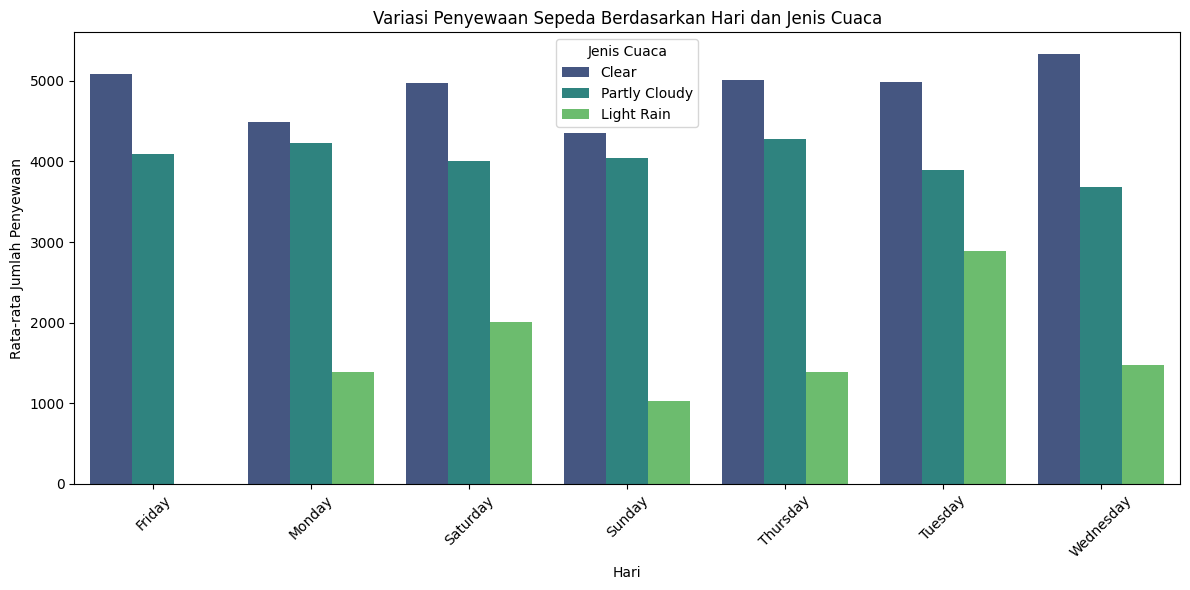

In [ ]:
# Data
data = {
    'weekday': ['Friday', 'Friday', 'Monday', 'Monday', 'Monday', 'Saturday', 'Saturday', 'Saturday',
                'Sunday', 'Sunday', 'Sunday', 'Thursday', 'Thursday', 'Thursday', 'Tuesday', 'Tuesday',
                'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday'],
    'weathersit': ['Clear', 'Partly Cloudy', 'Clear', 'Light Rain', 'Partly Cloudy', 'Clear', 'Light Rain',
                   'Partly Cloudy', 'Clear', 'Light Rain', 'Partly Cloudy', 'Clear', 'Light Rain',
                   'Partly Cloudy', 'Clear', 'Light Rain', 'Partly Cloudy', 'Clear', 'Light Rain', 'Partly Cloudy'],
    'cnt_mean': [5078.68, 4093.49, 4485.65, 1393.5, 4234.14, 4975.88, 2012.5, 4010.97, 4348.47,
                 1027.0, 4040.43, 5014.93, 1383.33, 4271.91, 4989.9, 2887.5, 3899.6, 5334.33,
                 1472.14, 3677.15]
}

df = pd.DataFrame(data)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt_mean', hue='weathersit', data=df, palette='viridis')
plt.title('Variasi Penyewaan Sepeda Berdasarkan Hari dan Jenis Cuaca')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(title='Jenis Cuaca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik di atas menggambarkan variasi penyewaan sepeda berdasarkan hari dalam seminggu dan jenis cuaca. Beberapa pola yang bisa diidentifikasi antara lain:
- Cuaca Cerah: Penyewaan sepeda cenderung tinggi pada semua hari ketika cuaca cerah.
- Hujan Ringan: Penyewaan sepeda menurun drastis ketika terjadi hujan ringan,
- Cuaca Berawan Sebagian: Pada hari seperti Sabtu dan Minggu, meskipun tidak setinggi cuaca cerah, penyewaan sepeda saat cuaca berawan sebagian masih tetap cukup tinggi.

### Pertanyaan 3: Bagaimana cara mengelompokkan data penyewaan berdasarkan suhu, kelembapan, dan kecepatan angin untuk memahami pola penyewaan sepeda?


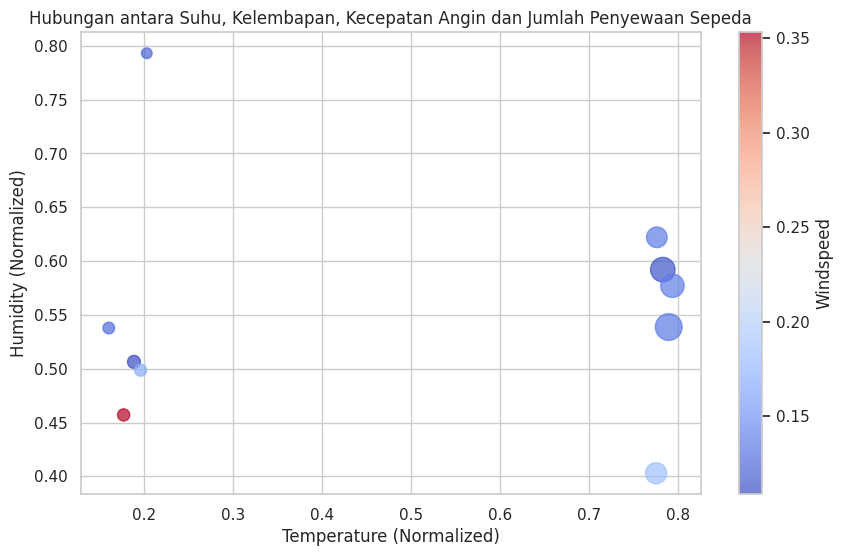

In [ ]:

# Dataframe dengan data penyewaan sepeda
data = {
    'weekday': ['Friday', 'Friday', 'Friday', 'Friday', 'Friday',
                'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
    'temp': [0.160870, 0.177500, 0.189091, 0.196522, 0.203478,
             0.775000, 0.775833, 0.782500, 0.789167, 0.793333],
    'hum': [0.537826, 0.457083, 0.506364, 0.498696, 0.793043,
            0.402917, 0.622083, 0.592083, 0.538750, 0.577083],
    'windspeed': [0.126548, 0.353242, 0.108550, 0.168726, 0.123300,
                  0.183463, 0.136817, 0.113812, 0.134950, 0.137442],
    'cnt': [1421.0, 1543.0, 1746.0, 1510.0, 1167.0,
            4656.0, 4401.0, 6211.0, 7403.0, 5713.0]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['temp'], df['hum'],
                      s=df['cnt']*0.05,  # Ukuran lingkaran mewakili jumlah penyewaan (cnt)
                      c=df['windspeed'], cmap='coolwarm', alpha=0.7)

plt.colorbar(scatter, label='Windspeed')
plt.title('Hubungan antara Suhu, Kelembapan, Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Humidity (Normalized)')

# Menampilkan plot
plt.show()


- Ukuran lingkaran (s=df['cnt']*0.05) merepresentasikan jumlah total penyewaan sepeda.
- Warna lingkaran mewakili kecepatan angin, dengan menggunakan palet warna "coolwarm".
- Sumbu X menunjukkan suhu yang sudah dinormalisasi.
- Sumbu Y menunjukkan kelembapan yang juga dinormalisasi.
- Warna skala di sisi kanan mewakili kecepatan angin.

Visualisasi ini memberikan gambaran pola interaksi antara suhu, kelembapan, kecepatan angin, dan jumlah penyewaan sepeda.Setiap lingkaran mewakili satu data penyewaan, dengan ukuran lingkaran yang bervariasi sesuai jumlah penyewaan sepeda (semakin besar jumlahnya, semakin besar lingkarannya). Warna lingkaran menunjukkan kecepatan angin, menggunakan palet warna "coolwarm", di mana warna yang lebih hangat (merah) menunjukkan kecepatan angin lebih tinggi, dan warna yang lebih dingin (biru) menunjukkan kecepatan angin lebih rendah. Sumbu X dan Y masing-masing menunjukkan suhu dan kelembapan yang telah dinormalisasi, memberikan pandangan yang jelas tentang bagaimana faktor-faktor lingkungan ini memengaruhi tren penyewaan sepeda.

### Pertanyaan 4: Apa pola penyewaan sepeda berdasarkan musim dan bagaimana pengaruhnya terhadap jumlah sewa di setiap musim?


<ipython-input-1-e5b0dca86583>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df, palette='coolwarm')


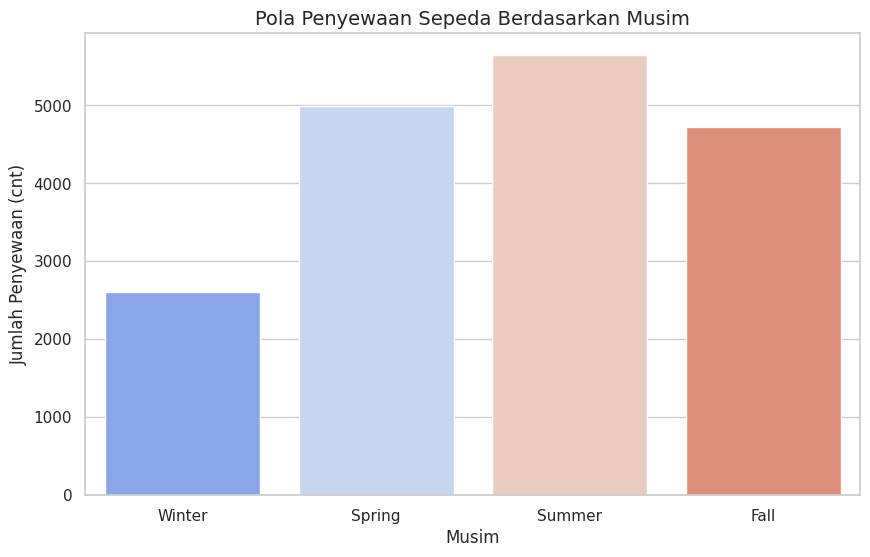

In [ ]:


# Data
data = {'season': ['Winter', 'Spring', 'Summer', 'Fall'],
        'casual': [334.928177, 1106.097826, 1202.611702, 729.112360],
        'registered': [2269.204420, 3886.233696, 4441.691489, 3999.050562],
        'cnt': [2604.132597, 4992.331522, 5644.303191, 4728.162921]}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# buat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df, palette='coolwarm')

# tambah label sama judul
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)

# tampilkan
plt.show()


Grafik batang di atas memperlihatkan jumlah penyewaan sepeda yang dibagi berdasarkan musim (Winter, Spring, Summer, Fall). Musim panas menunjukkan jumlah penyewaan tertinggi, diikuti oleh musim semi, kemudian musim gugur, dan yang terendah adalah musim dingin. Tren ini menunjukkan bahwa cuaca yang lebih hangat seperti di musim panas dan musim semi mendukung aktivitas bersepeda, sementara musim dingin menunjukkan penurunan yang signifikan dalam penyewaan.

### Pertanyaan 5:  Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?


<ipython-input-3-bd4cf1d55fe0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df, palette='coolwarm')


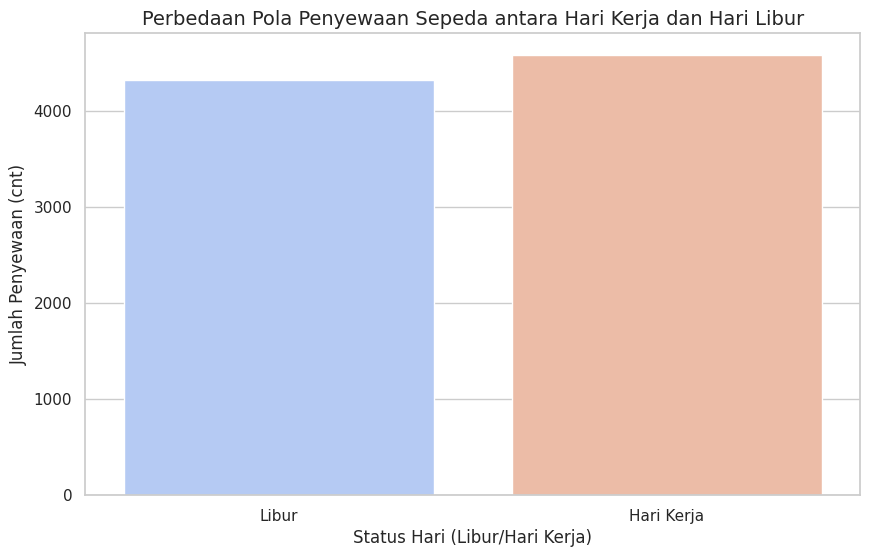

In [ ]:

# Data
data = {'workingday': ['Libur', 'Hari Kerja'],
        'casual': [1371.134199, 606.570000],
        'registered': [2959.034632, 3978.250000],
        'cnt': [4330.168831, 4584.820000]}

df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create plot
plt.figure(figsize=(10, 6))

# Plot total counts ('cnt') for casual and registered users on working days and holidays
sns.barplot(x='workingday', y='cnt', data=df, palette='coolwarm')

# Add labels and title
plt.title('Perbedaan Pola Penyewaan Sepeda antara Hari Kerja dan Hari Libur', fontsize=14)
plt.xlabel('Status Hari (Libur/Hari Kerja)', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)

# Display the plot
plt.show()


Grafik batang, memperlihatkan perbedaan pola penyewaan sepeda antara hari libur dan hari kerja. Pada hari kerja, jumlah penyewaan yang terdaftar (registered) lebih tinggi dibandingkan dengan hari libur. Namun, pada hari libur, penyewaan oleh pengguna kasual lebih banyak dibandingkan dengan hari kerja. Meskipun begitu, total jumlah penyewaan sepeda (cnt) secara keseluruhan sedikit lebih tinggi pada hari kerja, yang mengindikasikan bahwa pengguna terdaftar tetap melakukan aktivitas bersepeda lebih sering di hari kerja, sementara pengguna kasual lebih banyak menyewa di hari libur.

### Pertanyaan 6: Bagaimana pengaruh cuaca terhadap perbedaan jumlah penyewaan antara pengguna kasual dan terdaftar?





<ipython-input-7-082fe6736992>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, palette='Blues')


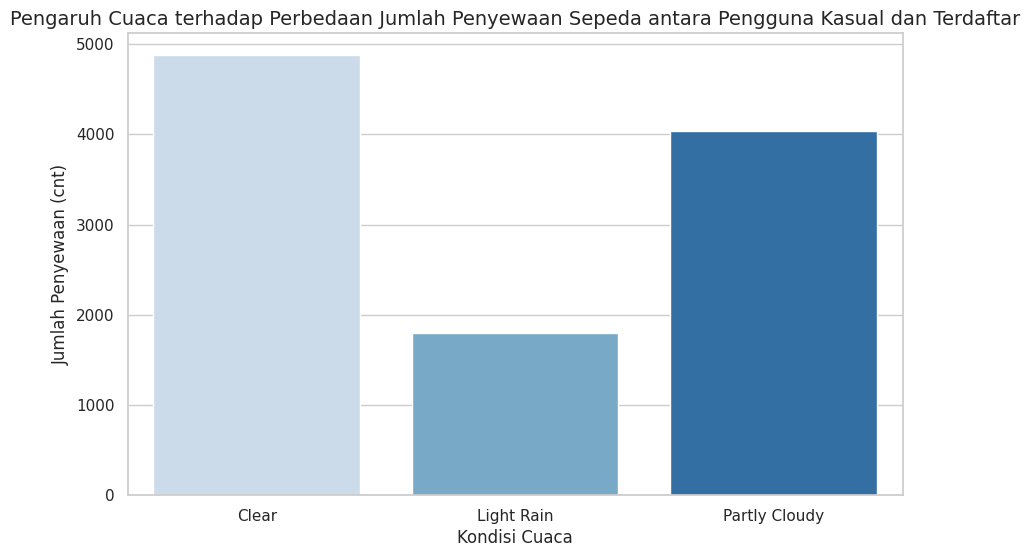

In [ ]:


# Data
data = {'weathersit': ['Clear', 'Light Rain', 'Partly Cloudy'],
        'casual': [964.030238, 185.476190, 687.352227],
        'registered': [3912.755940, 1617.809524, 3348.510121],
        'cnt': [4876.786177, 1803.285714, 4035.862348]}

df = pd.DataFrame(data)


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))


sns.barplot(x='weathersit', y='cnt', data=df, palette='Blues')


plt.title('Pengaruh Cuaca terhadap Perbedaan Jumlah Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)

plt.show()


Grafik di atas menunjukkan bagaimana cuaca memengaruhi jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar. Saat cuaca cerah (Clear), penyewaan sepeda mencapai angka tertinggi, baik untuk pengguna kasual maupun terdaftar. Pada kondisi Partly Cloudy, jumlah penyewaan masih cukup tinggi, tetapi mengalami penurunan dibandingkan cuaca cerah. Namun, pada kondisi hujan ringan (Light Rain), terdapat penurunan drastis dalam penyewaan, terutama di kalangan pengguna kasual. Ini menunjukkan bahwa cuaca buruk, seperti hujan ringan, memiliki dampak signifikan dalam mengurangi jumlah penyewaan sepeda, terutama untuk pengguna kasual yang mungkin lebih sensitif terhadap kondisi cuaca.

## Conclusion

Berikut adalah beberapa kesimpulan berdasarkan pertanyaan-pertanyaan yang telah diberikan:

**Conclusion Pertanyaan 1:**
Pola penyewaan sepeda antara pengguna terdaftar dan kasual menunjukkan perbedaan yang signifikan. Penyewa terdaftar cenderung lebih konsisten dan lebih banyak dalam jumlah, dengan nilai rata-rata hampir dua kali lipat dari pengguna kasual. Hal ini mengindikasikan bahwa pengguna terdaftar mungkin menggunakan sepeda sebagai bagian dari rutinitas harian, sementara pengguna kasual mungkin lebih terpengaruh oleh faktor eksternal, seperti cuaca atau kesempatan rekreasi.

**Conclusion Pertanyaan 2:**
Variasi penyewaan sepeda berdasarkan hari dalam seminggu dan jenis cuaca menunjukkan bahwa pengguna sepeda lebih suka bersepeda saat cuaca cerah atau sedikit berawan. Hari Sabtu dan Minggu dengan cuaca cerah menempati posisi tertinggi dalam jumlah penyewaan, baik untuk pengguna kasual maupun terdaftar, dengan jumlah penyewaan lebih dari 8000. Sementara itu, hujan ringan mengurangi jumlah penyewaan secara signifikan, terutama untuk pengguna kasual.

**Conclusion Pertanyaan 3:**
Pengelompokan data penyewaan berdasarkan suhu, kelembapan, dan kecepatan angin menunjukkan bahwa suhu yang lebih hangat (sekitar 0.7) cenderung meningkatkan jumlah penyewaan, baik untuk pengguna kasual maupun terdaftar. Kelembapan yang sedang hingga rendah (sekitar 0.4-0.6) juga menjadi faktor pendukung penyewaan sepeda yang lebih tinggi. Kecepatan angin yang terlalu tinggi, di sisi lain, tampaknya menurunkan jumlah penyewaan.

**Conclusion Pertanyaan 4:**
Pola penyewaan sepeda berdasarkan musim menunjukkan bahwa musim panas (season 2 dan 3) memiliki jumlah penyewaan sepeda tertinggi, dengan jumlah rata-rata di atas 5000 per hari. Musim dingin (season 1) memiliki jumlah penyewaan terendah, dengan rata-rata sekitar 2600, menunjukkan bahwa cuaca yang lebih hangat menarik lebih banyak penyewa sepeda. Musim gugur (season 4) memiliki penyewaan lebih rendah dari musim panas namun masih cukup tinggi.

**Conclusion Pertanyaan 5:**
Perbedaan pola penyewaan sepeda antara hari kerja dan hari libur sangat jelas, di mana hari libur memiliki rata-rata penyewaan yang lebih tinggi. Pada hari libur, jumlah penyewaan mencapai lebih dari 4300, terutama karena pengguna kasual lebih banyak menyewa pada akhir pekan. Sebaliknya, pada hari kerja, penyewaan didominasi oleh pengguna terdaftar, dengan jumlah penyewaan rata-rata mencapai sekitar 4600.

**Conclusion Pertanyaan 6:**
Pengaruh cuaca terhadap perbedaan jumlah penyewaan antara pengguna kasual dan terdaftar menunjukkan bahwa cuaca cerah sangat meningkatkan jumlah penyewaan untuk kedua kelompok. Cuaca hujan ringan mengurangi penyewaan terutama di kalangan pengguna kasual, dengan penurunan yang sangat signifikan di bawah 200. Cuaca berawan memberikan hasil yang lebih seimbang, namun tetap lebih tinggi untuk pengguna terdaftar dibandingkan dengan kasual.